In [155]:
import tensorflow as tf
import tensorflow.keras as keras
import spacy
import nltk
import transformers
import datasets
import pandas as pd
import matplotlib
import sklearn

print(f"TensorFlow:   {tf.__version__}")
print(f"Keras:        {keras.__version__}")
print(f"spaCy:        {spacy.__version__}")
print(f"NLTK:         {nltk.__version__}")
print(f"Transformers: {transformers.__version__}")
print(f"Datasets:     {datasets.__version__}")
print(f"Pandas:       {pd.__version__}")
print(f"Matplotlib:   {matplotlib.__version__}")
print(f"Scikit-Learn: {sklearn.__version__}")

# GPU Check
print("\n--- GPU Status ---")
print("TensorFlow GPU:", tf.config.list_physical_devices('GPU'))


TensorFlow:   2.20.0
Keras:        3.13.2
spaCy:        3.8.11
NLTK:         3.9.3
Transformers: 5.2.0
Datasets:     4.6.0
Pandas:       3.0.1
Matplotlib:   3.10.8
Scikit-Learn: 1.8.0

--- GPU Status ---
TensorFlow GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [156]:
import re

In [157]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/dipti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/dipti/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [158]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
stopwords = set(stopwords.words('english'))

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, StratifiedKFold


In [160]:
df = pd.read_csv('../dataset/TwitterHate.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [161]:
df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [162]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      31962 non-null  int64
 1   label   31962 non-null  int64
 2   tweet   31962 non-null  str  
dtypes: int64(2), str(1)
memory usage: 3.4 MB


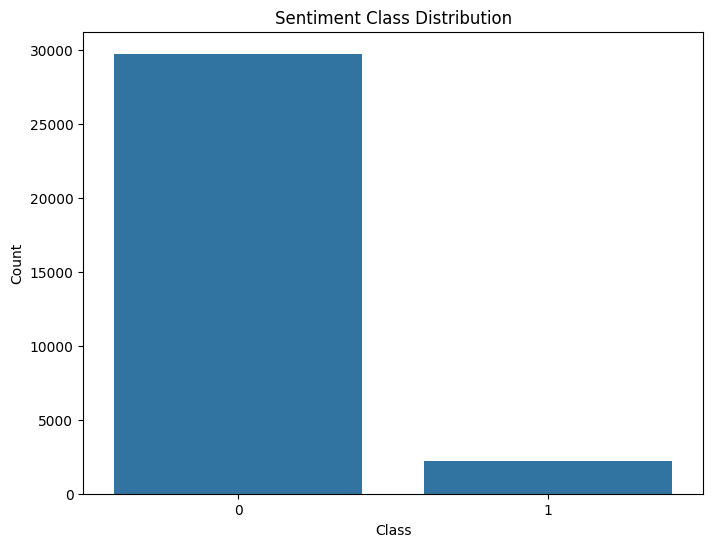

In [183]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['label'])
plt.title('Sentiment Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.savefig('../figure/Class-Distribution.jpg')

In [163]:
# write a function to normalize tweet column contents by removing URLs, mentions, hashtags, and special characters
def normalize_tweet(tweet):
	# Convert to lowercase
	tweet = tweet.lower()
	# Remove URLs
	tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
	# Remove mentions
	tweet = re.sub(r'@\w+', '', tweet)
	# Remove hashtags
	tweet = re.sub(r'#\w+', '', tweet)
	# Remove special characters / punctuations and numbers
	tweet = re.sub(r'[^\w\s]', '', tweet)
	return tweet.strip()

df['tweet_cleaned'] = df['tweet'].apply(normalize_tweet)

In [164]:
tweet_tokenizer = TweetTokenizer()
lemmatizer = WordNetLemmatizer()

def preprocess_tweet(tweet):
    tokens = tweet.encode('ascii','ignore').decode()
    tokens = tweet_tokenizer.tokenize(tokens)
    tokens = [token for token in tokens if token not in ['amp','rt','lt','gt']]
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords]
    return ' '.join(tokens)

df['tweet_processed'] = df['tweet_cleaned'].apply(preprocess_tweet)

In [165]:
from collections import Counter
all_words = ' '.join(df['tweet_processed']).split()
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(10)
print(most_common_words)

[('day', 2507), ('u', 1615), ('happy', 1576), ('love', 1251), ('time', 1192), ('im', 1149), ('today', 1017), ('like', 1002), ('get', 992), ('new', 921)]


In [166]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['tweet_processed'])
y = df['label']

In [167]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((25569, 5000), (6393, 5000), (25569,), (6393,))

In [168]:
model = LogisticRegression()
model.fit(x_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [169]:
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9449397778820585
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5945
           1       0.91      0.24      0.38       448

    accuracy                           0.94      6393
   macro avg       0.93      0.62      0.67      6393
weighted avg       0.94      0.94      0.93      6393



In [170]:

param_grid = {'C': [0.1, 1, 10, 100], 'penalty':['l2']}
grid = GridSearchCV(LogisticRegression(class_weight ='balanced'), param_grid, cv=StratifiedKFold(4), scoring='recall')
grid.fit(x_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

/home/dipti/nlp-venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/home/dipti/nlp-venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/home/dipti/nlp-venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warn

Best parameters: {'C': 1, 'penalty': 'l2'}
Best score: 0.6984432170696786


/home/dipti/nlp-venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


In [171]:
y_pred = grid.best_estimator_.predict(x_test)

In [172]:
print(f'Tuned Model Classification report : ')
print(classification_report(y_pred,y_test))
print(f'Recall Score = {recall_score(y_pred,y_test)}')



Tuned Model Classification report : 
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5503
           1       0.71      0.36      0.47       890

    accuracy                           0.89      6393
   macro avg       0.80      0.67      0.71      6393
weighted avg       0.88      0.89      0.87      6393

Recall Score = 0.3550561797752809
